## Lasso回归

### 一.手写模型

example.dat数据集：

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [3]:
data = np.genfromtxt('example.dat', delimiter = ',') # 读取数据

print(data.shape) # 查看数据形状
print(data[0])    # 查看第1条数据

# 选择特征与标签
x = data[:,0:100] 
y = data[:,100].reshape(-1,1)
# 加一列
X = np.column_stack((np.ones((x.shape[0],1)),x))

# 划分训练集与测试集
X_train, y_train = X[:70], y[:70]
X_test, y_test = X[70:], y[70:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(101, 101)
[-1.14558 -1.29249  0.84911  0.36008  0.26068  2.51167  2.31855  0.60805
  0.3428  -0.28903  0.70398  1.18534 -1.44321 -0.72979 -0.06026 -0.50449
 -0.3148   0.94552 -0.32453 -0.09248  0.84448  0.32551  0.57684 -0.12461
 -0.5531  -1.37074 -0.85719  0.05802  0.27486 -0.09269  0.28742 -1.29854
  0.66856  0.02223  0.28599 -0.28722  0.54304  0.67301 -0.67343  1.19857
  1.35595  1.53356 -0.61245  1.91698  1.89642  1.28004  0.60073 -0.37792
  0.34903  2.17043 -1.52004 -0.75143 -0.54607 -0.46285  0.28424  0.02458
 -2.31083 -0.43165  0.87581 -0.07552  0.66682  1.65492 -0.71924  1.39364
  0.5405   0.55335  1.00319 -0.76292 -0.26241 -1.32323 -0.15256 -0.30767
  0.37729  0.02091  1.05892 -0.30399  1.76204 -1.38097  0.96642 -0.34674
  0.92688 -1.05426 -0.50192  0.11954  0.97006  2.01984  0.00975  0.65729
 -1.01224  0.93274 -1.92116  0.16212 -0.60644  1.57021 -1.40166 -0.65263
 -0.08357  0.78098  1.5532  -1.42135  1.19238]
(70, 101) (70, 1) (31, 101) (31, 1)


In [4]:
# 定义参数初始化函数
def initialize(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

In [5]:
# 定义符号函数
def sign(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [6]:
# 利用numpy对符号函数进行向量化
vec_sign = np.vectorize(sign)
vec_sign(np.zeros((3,1)))

array([[0],
       [0],
       [0]])

In [7]:
# 定义lasso损失函数
def l1_loss(X, y, w, b, alpha):
    num_train = X.shape[0]
    num_feature = X.shape[1]
    y_hat = np.dot(X, w) + b
    loss = np.sum((y_hat-y)**2)/num_train + np.sum(alpha*abs(w))
    dw = np.dot(X.T, (y_hat-y)) /num_train + alpha * vec_sign(w)
    db = np.sum((y_hat-y)) /num_train
    return y_hat, loss, dw, db

In [8]:
# 定义训练过程
def lasso_train(X, y, learning_rate=0.01, epochs=300):
    loss_list = []
    w, b = initialize(X.shape[1])
    for i in range(1, epochs):
        y_hat, loss, dw, db = l1_loss(X, y, w, b, 0.1)
        w += -learning_rate * dw
        b += -learning_rate * db
        loss_list.append(loss)
        
        if i % 300 == 0:
            print('epoch %d loss %f' % (i, loss))
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw': dw,
            'db': db
        }
    return loss, loss_list, params, grads

In [9]:
# 执行训练示例
loss, loss_list, params, grads = lasso_train(X_train, y_train, 0.01, 3000)

# 获取训练参数
print(params)

epoch 300 loss 1.673867
epoch 600 loss 1.555281
epoch 900 loss 1.524316
epoch 1200 loss 1.511976
epoch 1500 loss 1.509368
epoch 1800 loss 1.508463
epoch 2100 loss 1.508338
epoch 2400 loss 1.508864
epoch 2700 loss 1.509530
{'w': array([[-4.15287071e-04],
       [-1.41146247e-04],
       [ 5.93911643e-01],
       [ 6.33518504e-01],
       [ 5.02749849e-04],
       [ 9.98579102e-01],
       [-9.55002381e-05],
       [ 8.20516431e-01],
       [-2.38262290e-01],
       [ 6.40435429e-04],
       [ 4.33006493e-04],
       [ 7.92352389e-01],
       [ 2.29087658e-04],
       [ 7.38414989e-01],
       [-2.88069963e-04],
       [-1.28572747e-01],
       [ 2.92098422e-04],
       [ 7.84412804e-01],
       [-8.43058310e-04],
       [ 8.19502197e-01],
       [ 1.23168002e-03],
       [ 1.31828725e-03],
       [ 2.16775072e-04],
       [ 5.61334435e-01],
       [ 2.15957743e-04],
       [-9.00543335e-04],
       [-5.32628338e-05],
       [-1.35244745e-03],
       [ 3.41327350e-04],
       [ 4.8838067

In [10]:
# 定义预测函数
def predict(X, params):
    w = params['w']
    b = params['b']
    y_pred = np.dot(X, w) + b
    return y_pred

In [11]:
y_pred = predict(X_test, params) # 预测
y_pred[:5]                       # 查看前5个预测结果
y_test[:5]                       # 查看前5个真实值

array([[ 0.24671],
       [-4.25711],
       [ 2.38642],
       [-1.87815],
       [-3.41362]])

In [12]:
# 计算r2值
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.5704547131357189

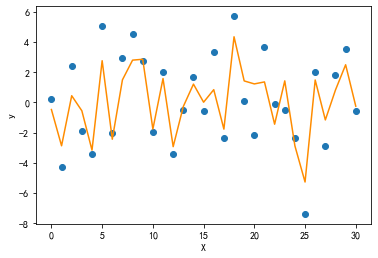

In [13]:
# 绘图1：简单绘图
import matplotlib.pyplot as plt
f = X_test.dot(params['w']) + params['b']
plt.scatter(range(X_test.shape[0]), y_test)
plt.plot(f, color = 'darkorange')
plt.xlabel('X')
plt.ylabel('y')
plt.show();

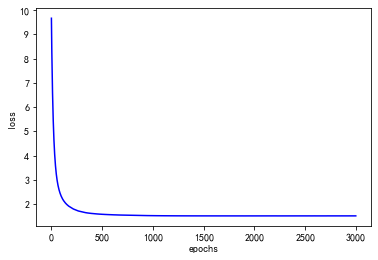

In [14]:
# 绘图2：训练过程中的损失下降
plt.plot(loss_list, color = 'blue')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### 二.使用sklearn模型

In [15]:
from sklearn import linear_model # 导入线性模型模块
sk_lasso = linear_model.Lasso(alpha=0.1) # 创建lasso模型实例
sk_lasso.fit(X_train, y_train) # 对训练集进行拟合
# 打印模型相关系数
print("sklearn Lasso intercept :", sk_lasso.intercept_)
print("\nsklearn Lasso coefficients :\n", sk_lasso.coef_)
print("\nsklearn Lasso number of iterations :", sk_lasso.n_iter_)

sklearn Lasso intercept : [-0.23824815]

sklearn Lasso coefficients :
 [ 0.         -0.          0.59804516  0.64230683  0.          1.0070841
 -0.          0.81815409 -0.22756851  0.          0.          0.793601
  0.          0.74108335 -0.         -0.1250168  -0.          0.79407074
  0.          0.81867433  0.          0.         -0.          0.56664364
 -0.         -0.         -0.         -0.         -0.          0.49526526
  0.          0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.0078254   0.          0.         -0.
 -0.          0.01986066  0.         -0.          0.         -0.
  0.         -0.06797763  0.24581414  0.         -0.04180909 -0.
  0.10542471  0.03156005  0.          0.          0.         -0.
 -0.          0.         -0.          0.12548825  0.2340209  -0.
  0.          0.16875552  0.          0.01596168  0.         -0.
  0.          0.         -0.          0.2005080